In [9]:
import requests
import time
from time import sleep

url = "https://api.wheretheiss.at/v1/satellites/25544"

latitudes = []
longitudes = []
timestamps = []

for _ in range(100):
    response = requests.get(url)
    data = response.json()
    latitudes.append(float(data['latitude']))
    longitudes.append(float(data['longitude']))
    timestamps.append(data['timestamp'])
    sleep(10)



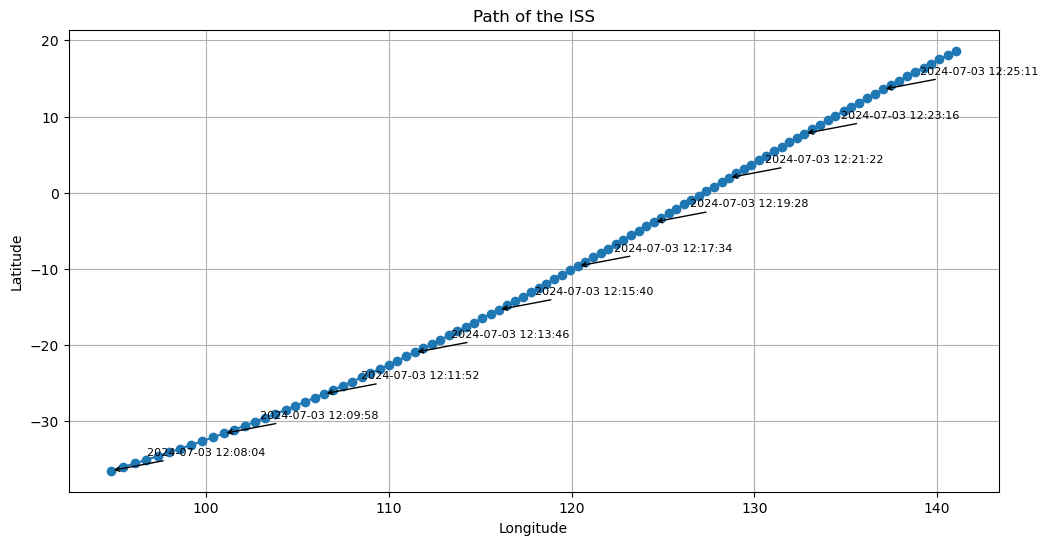

In [28]:
import matplotlib.pyplot as plt
from datetime import datetime

timestamps_human = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S') for ts in timestamps]

plt.figure(figsize=(12, 6))
plt.plot(longitudes, latitudes, marker='o')

plt.title('Path of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

for i in range(0, len(longitudes), 10):
    plt.annotate(timestamps_human[i], xy=(longitudes[i], latitudes[i]), xytext=(longitudes[i]+2, latitudes[i]+2),
                 fontsize=8, arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()
